In [31]:
import numpy as np
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from numpy import mean
from numpy import std
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from sklearn.model_selection import KFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directoryimport matplotlib.pyplot as plt
import seaborn as sns

In [32]:
!ls

AGEs.csv
SpecAnalysis
Untitled.ipynb
add_label.py
ages.ipynb
ann.ipynb
imodpoly_raman_spectroscopy
lda_kernel.ipynb
logs
matlab_2
matlab_raman_preprocessed
matlab_raman_preprocessed copy
matlab_raman_preprocessed copy.zip
original_raman_spectroscopy
papers
pca_kernel.ipynb
pca_svm.ipynb
plolyfit_ann-jvsc-7aedbb54-b08c-4e56-b67b-12dd5e91cff2.ipynb
plolyfit_ann.ipynb
plot
plot1.png
plot2_1.pdf
polyfit_old.ipynb
raman-spectroscopy-project.ipynb
scaling.py
testing
transform.py
visualize.ipynb


In [61]:
dataplot = 'veinData'

In [62]:
vein = pd.read_csv(f'matlab_2/{dataplot}.csv', header=None)

In [63]:
vein

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,0.000459,0.000842,0.001020,0.001175,0.001227,0.001222,0.001192,0.001119,0.001023,0.000914,...,0.001170,0.001078,0.000901,0.000693,0.000548,0.000513,0.000586,0.000751,0.001041,0.001157
1,0.000805,0.001099,0.001318,0.001391,0.001313,0.001203,0.001067,0.000907,0.000822,0.000804,...,0.000936,0.000883,0.000836,0.000847,0.000887,0.000937,0.000925,0.000876,0.000802,0.000725
2,0.000960,0.001078,0.001190,0.001186,0.001081,0.000913,0.000676,0.000456,0.000343,0.000334,...,0.000931,0.000857,0.000702,0.000579,0.000582,0.000770,0.000766,0.000658,0.000538,0.000000
3,0.001285,0.001458,0.001437,0.001432,0.001361,0.001247,0.001122,0.001004,0.000892,0.000821,...,0.000754,0.000808,0.000859,0.000970,0.001111,0.001264,0.001327,0.001307,0.001220,0.001039
4,0.000826,0.001054,0.001240,0.001285,0.001196,0.001090,0.000964,0.000853,0.000852,0.000905,...,0.000849,0.000844,0.000728,0.000855,0.000999,0.001026,0.001050,0.001058,0.000838,0.000797
5,0.001059,0.000890,0.000785,0.000768,0.000846,0.000877,0.000857,0.000853,0.000819,0.000758,...,0.001038,0.001013,0.000943,0.001016,0.001077,0.001036,0.001045,0.001064,0.000940,0.000993
6,0.001207,0.001342,0.001672,0.001719,0.001613,0.001505,0.001347,0.001162,0.001127,0.001155,...,0.000591,0.000626,0.000686,0.000744,0.000824,0.000937,0.000959,0.000923,0.000918,0.000682
7,0.000570,0.000902,0.000964,0.000990,0.000880,0.000779,0.000728,0.000704,0.000737,0.000825,...,0.000641,0.000645,0.000668,0.000667,0.000672,0.000707,0.000767,0.000832,0.000913,0.001020
8,0.000585,0.000847,0.000989,0.001062,0.001034,0.001008,0.001003,0.000971,0.000952,0.000973,...,0.001010,0.000986,0.000920,0.000802,0.000729,0.000761,0.000794,0.000820,0.000895,0.000787
9,0.000304,0.000582,0.000750,0.000907,0.001007,0.001020,0.000965,0.000887,0.000805,0.000757,...,0.000616,0.000560,0.000490,0.000503,0.000586,0.000730,0.000828,0.000872,0.000890,0.000681


In [64]:
vein = vein.to_numpy()

In [65]:
find_local_maxima(earData[0, :])

NameError: name 'find_local_maxima' is not defined

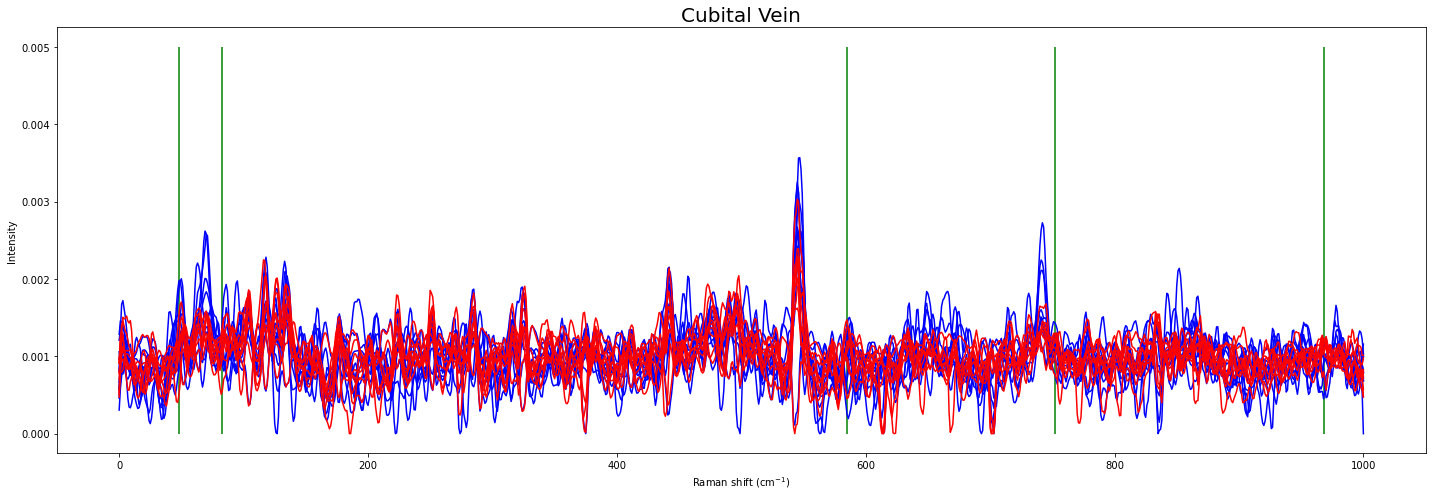

In [66]:
plt.figure(figsize=(20, 7))
plt.vlines(48, ymax=0.005, ymin = 0, color='green')
plt.vlines(83, ymax=0.005, ymin = 0, color='green')
plt.vlines(585, ymax=0.005, ymin = 0, color='green')
plt.vlines(752, ymax=0.005, ymin = 0, color='green')
plt.vlines(968, ymax=0.005, ymin = 0, color='green')
for i in range(20):
    if i < 11:
        plt.plot(vein[i, :], color='blue')
    else:
        plt.plot(vein[i, :], color='red')


plt.xlabel('Raman shift (cm$^{-1}$)')
plt.ylabel('Intensity')
plt.title('Cubital Vein', fontsize=20)
plt.savefig(f'matlab_2/{dataplot}.pdf')
plt.show()

In [9]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(earData)
X_pca

array([[ 0.00507213,  0.00380011],
       [-0.00471134,  0.00016913],
       [-0.00076263,  0.00115092],
       [-0.00627669, -0.00392982],
       [ 0.00666114,  0.00578602],
       [ 0.01139158, -0.00084824],
       [-0.00380683,  0.00265854],
       [-0.00327495,  0.00620225],
       [-0.00061808,  0.00102193],
       [-0.00545442, -0.00085233],
       [ 0.0045333 ,  0.00254062],
       [-0.00011025, -0.00212592],
       [-0.00308144, -0.00252051],
       [-0.00848018,  0.0013541 ],
       [ 0.00181898, -0.00546785],
       [ 0.01291472, -0.00408325],
       [-0.00337563, -0.00443751],
       [-0.0014818 ,  0.00579206],
       [ 0.00299931, -0.00302685],
       [-0.00395691, -0.00318339]])

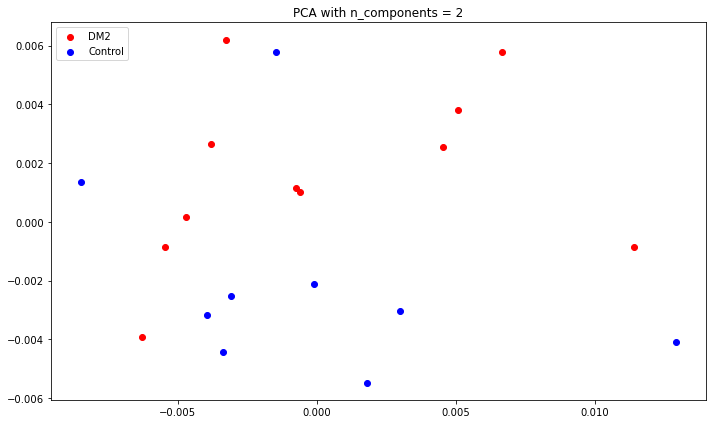

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0][:11], X_pca[:, 1][:11], c='red')
plt.scatter(X_pca[:, 0][11:], X_pca[:, 1][11:], c='blue')
plt.legend(['DM2', 'Control'], loc="upper left")
plt.title(f'PCA with n_components = {pca.n_components_}')
# plt.savefig('plot/pca_2.pdf', bbox_inches='tight')
plt.show()

In [10]:
target = pd.read_csv('matlab_raman_preprocessed copy/earData.csv')['has_DM2']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)

In [12]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [13]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



**Linear Discriminant Analysis**

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LinearDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(earData, target, test_size=0.2, random_state=42)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_train, y_train)
y_pred = lda.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



In [30]:
pca.explained_variance_ratio_

array([0.43809996, 0.1751886 ])